Load Dataset

In [7]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target

In [8]:
print(X)
print(breast_cancer.feature_names)
print(X.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


Dataset preparation

In [9]:
# Dataset preparation
data_with_feature_name = pd.DataFrame(data = X, columns = breast_cancer.feature_names)
data = data_with_feature_name
data['class'] = Y

Train and Test Split

In [10]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_data = data.drop('class', axis=1)
Y_data = data['class']
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, stratify = Y_data, random_state = 1)

Binarization of data

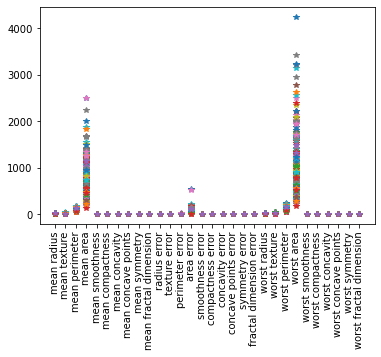

In [11]:
# As MP Neuron takes binary data as input, so we have to binarize the input including train & test both
# Example of input data before binarization
from matplotlib import pyplot as plt
plt.plot(X_train.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [12]:
# The below shown code is just for an example of binarization on single column
# For actual training, the binarization need to be applied on all columns
# We have taken "mean area" and binarised on an apprx mean 1000 value of the column
binarised_on_the_besis_of_4th_col = X_train['mean area'].map(lambda x: 0 if x<1000 else 1)

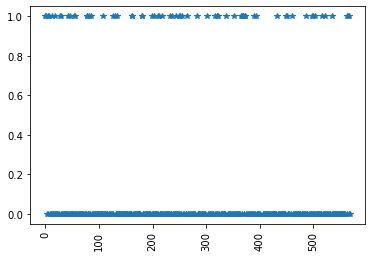

In [13]:
# The plot shows that --> We have binaried the X_train on the basis of 4th col with a threshold value of 1000
plt.plot(binarised_on_the_besis_of_4th_col.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [14]:
# Now lets do it for entire X_train set using pd.cut --> which binarises the dataset automatically

# NB : You can play around with labels = [1,0] or [0,1] for both test and train then see the chnages 

binarised_X_train = X_train.apply(pd.cut, bins = 2, labels = [1,0])

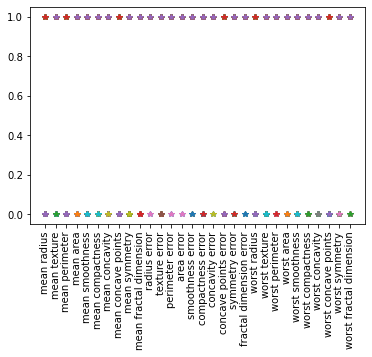

In [15]:
plt.plot(binarised_X_train.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [16]:
# Now lets do it for entire X_test set using pd.cut --> which binarises the dataset automatically

# NB : You can play around with labels = [1,0] or [0,1] for both test and train then see the chnages 

binarised_X_test = X_test.apply(pd.cut, bins = 2, labels = [1,0])

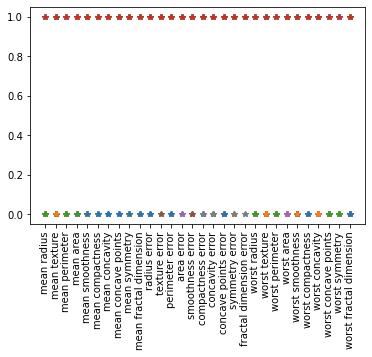

In [17]:
plt.plot(binarised_X_test.T, '*')
plt.xticks(rotation = 'vertical')
plt.show()

In [18]:
# Take only the values into account and not the column names
binarised_X_train = binarised_X_train.values
binarised_X_test = binarised_X_test.values

Rnning MP Neron algorithm on our pre-processed dataset

In [19]:
# Check for which value of b, the MP Neuron gives highest accuracy
old_acucracy = 0
old_b = 0
for b in range(binarised_X_train.shape[1] + 1):
    accurate_pred = 0
    for i, j in zip(binarised_X_train, Y_train):
        y_pred = (np.sum(i) >= b)
        accurate_pred += (j == y_pred)
        accuracy = (accurate_pred/binarised_X_train.shape[0])*100
    print(b, accuracy)
    if old_acucracy < accuracy:
        old_acucracy = accuracy
        old_b = b
print("Highest training acuuracy for the value of b is :",old_b, "and highest training accuracy is :",old_acucracy)

0 62.637362637362635
1 62.637362637362635
2 62.637362637362635
3 62.637362637362635
4 62.637362637362635
5 62.637362637362635
6 62.637362637362635
7 62.637362637362635
8 62.637362637362635
9 62.637362637362635
10 62.637362637362635
11 62.637362637362635
12 62.637362637362635
13 62.857142857142854
14 63.07692307692307
15 63.29670329670329
16 64.3956043956044
17 65.05494505494505
18 65.93406593406593
19 66.8131868131868
20 67.6923076923077
21 69.23076923076923
22 70.32967032967034
23 72.52747252747253
24 75.38461538461539
25 78.68131868131869
26 81.53846153846153
27 83.73626373626374
28 84.61538461538461
29 81.97802197802197
30 75.6043956043956
Highest training acuuracy for the value of b is : 28 and highest training accuracy is : 84.61538461538461


MP Neuron Class

In [26]:
class mpNeuron:
    def __init__(self):
        self.b = None

    def model(self, x):
        return (np.sum(x) >=self.b)

    def predict(self, X):
        y = []
        for x in X:
            y_pred = self.model(x)
            y.append(y_pred)
        return y

    def fit(self, X, Y):
        accuracy = {}
        for b in range(binarised_X_train.shape[1] + 1):
            self.b = b
            accurate_pred = 0
            y_pred_train_list = self.predict(X)
            accuracy[b] = accuracy_score(y_pred_train_list, Y)
        best_b = max(accuracy, key = accuracy.get)
        print("Optimal accuracy found for b =",best_b,"and the accuracy value is =",accuracy[best_b])

In [27]:
mp_Neuron = mpNeuron()
mp_Neuron.fit(binarised_X_train, Y_train)

Optimal accuracy found for b = 28 and the accuracy value is = 0.8461538461538461
